In [152]:
import struct
import numpy as np

In [153]:
def load_data(images,labels):
    with open(labels,'rb') as labelsPath:
        magic,n = struct.unpack('>II',labelsPath.read(8))
        labels = np.fromfile(labelsPath,dtype=np.uint8)
    with open(images,'rb') as imagesPath:
        magic,num,rows,cols = struct.unpack('>IIII',imagesPath.read(16))
        images = np.fromfile(imagesPath,dtype=np.uint8).reshape(len(labels),784)
    return images,labels

In [154]:
train_images,train_labels = load_data('/home/rg/Documents/AI/Specialization/train-images-idx3-ubyte','/home/rg/Documents/AI/Specialization/train-labels-idx1-ubyte')

In [155]:
train_images.shape

(60000, 784)

In [156]:
train_labels.shape

(60000,)

In [157]:
test_images,test_labels = load_data('/home/rg/Documents/AI/Specialization/t10k-images-idx3-ubyte','/home/rg/Documents/AI/Specialization/t10k-labels-idx1-ubyte')

In [158]:
test_images.shape

(10000, 784)

In [159]:
test_labels.shape

(10000,)

<h3>Steps to apply PCA:
<ol>
    <li>Standardize the data</li>
    <li>Compute the covariance matrix</li>
    <li>Solve for eigen values of the covariance matrix</li>
    <li>Figure out the top-N principal components</li>
</h3>
<h5>As our data contains images which are nothing but numpy array,first flatten the images and then standardize for each image </h5>

In [160]:
from matplotlib import pyplot as plt
# np.transpose(train_images[0]).shape
# Need to reshape the image before looking at it
temp = train_images[0].reshape(28,28) #(28,28) because 28*28 = 784.No,It cannot be otherwise

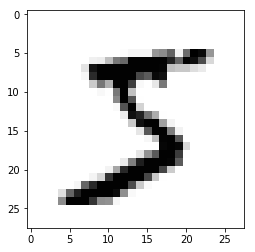

5


In [161]:
plt.imshow(temp,cmap="Greys") #Can also look at grey scale image with parameter cmap='Greys'
plt.show()
print(train_labels[0])

<h3>Step-1 is to standardize the data</h3>

In [162]:
train_temp = np.transpose(np.matrix(train_images))
train_images[0].shape

(784,)

<h3>Standardize the images</h3>

In [163]:
train_images.shape

(60000, 784)

In [164]:
train_images[0].shape

(784,)

In [165]:
import pandas as pd

In [166]:
data=pd.DataFrame(data=train_images)

In [167]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [168]:
# data.describe()

<h5>Save the dataframe</h5>

In [169]:
# data['Label'] = train_labels

In [170]:
data.columns

RangeIndex(start=0, stop=784, step=1)

In [171]:
# data.to_csv("train_images",sep=',')

In [172]:
def standardize(x):
    return (x-(np.mean(x))/(np.std(x)))

In [173]:
# temp_data.drop(["Label"],axis=1)

In [174]:
temp_data=data.T

In [175]:
temp_data=temp_data.apply(standardize)

In [176]:
temp_data = temp_data.T

In [177]:
temp_data.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,-0.440790,-0.440790,-0.440790,-0.440790,-0.440790,-0.440790,-0.440790,-0.440790,-0.440790,-0.440790,...,-0.440790,-0.440790,-0.440790,-0.440790,-0.440790,-0.440790,-0.440790,-0.440790,-0.440790,-0.440790
1,-0.472802,-0.472802,-0.472802,-0.472802,-0.472802,-0.472802,-0.472802,-0.472802,-0.472802,-0.472802,...,-0.472802,-0.472802,-0.472802,-0.472802,-0.472802,-0.472802,-0.472802,-0.472802,-0.472802,-0.472802
2,-0.378162,-0.378162,-0.378162,-0.378162,-0.378162,-0.378162,-0.378162,-0.378162,-0.378162,-0.378162,...,-0.378162,-0.378162,-0.378162,-0.378162,-0.378162,-0.378162,-0.378162,-0.378162,-0.378162,-0.378162
3,-0.330754,-0.330754,-0.330754,-0.330754,-0.330754,-0.330754,-0.330754,-0.330754,-0.330754,-0.330754,...,-0.330754,-0.330754,-0.330754,-0.330754,-0.330754,-0.330754,-0.330754,-0.330754,-0.330754,-0.330754
4,-0.398133,-0.398133,-0.398133,-0.398133,-0.398133,-0.398133,-0.398133,-0.398133,-0.398133,-0.398133,...,-0.398133,-0.398133,-0.398133,-0.398133,-0.398133,-0.398133,-0.398133,-0.398133,-0.398133,-0.398133


In [178]:
x = temp_data.values
sigma = np.matmul(np.transpose(x),x)/len(x)

In [179]:
from scipy.linalg import eigh
values,vectors=eigh(sigma)

In [180]:
mx,mn=vectors[len(vectors)-1],vectors[len(vectors)-2]
components = [mx,mn]
components = np.asarray(components)
print(components.shape)
data.T.shape

(2, 784)


(784, 60000)

In [181]:
new_coordinates = np.matmul(components,data.values.T) 
print(new_coordinates.T.shape)
temp_cor=new_coordinates.T
a = train_labels
print(len(np.transpose(a)))
print(len(temp_cor[:,0]),len(temp_cor[:,1]))
d={'Major':temp_cor[:,0],'Minor':temp_cor[:,1],'Labels':a}
z=pd.DataFrame(data=d)
# z.head()

(60000, 2)
60000
60000 60000


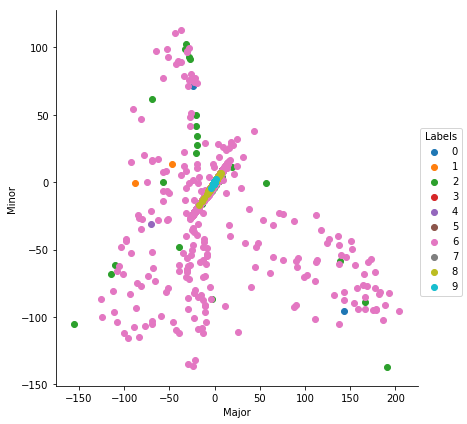

In [182]:
import seaborn as sns
sns.FacetGrid(z,hue='Labels',size=6).map(plt.scatter,'Major','Minor').add_legend()
plt.show()

<h4>Apply PCA on non-standardized data</h4>

In [184]:
# data.drop(['Label'],axis=1)
x2 = data.values
sigma = np.matmul(np.transpose(x2),x2)/len(x2)
values,vectors=eigh(sigma)

In [185]:
mx,mn=vectors[len(vectors)-1],vectors[len(vectors)-2]
components = [mx,mn]
components = np.asarray(components)
# print(components.shape)
# data.T.shape

In [186]:
new_coordinates = np.matmul(components,data.values.T) 
# print(new_coordinates.T.shape)
temp_cor=new_coordinates.T
a = train_labels
# print(len(np.transpose(a)))
# print(len(temp_cor[:,0]),len(temp_cor[:,1]))
d={'Major':temp_cor[:,0],'Minor':temp_cor[:,1],'Labels':a}
z=pd.DataFrame(data=d)

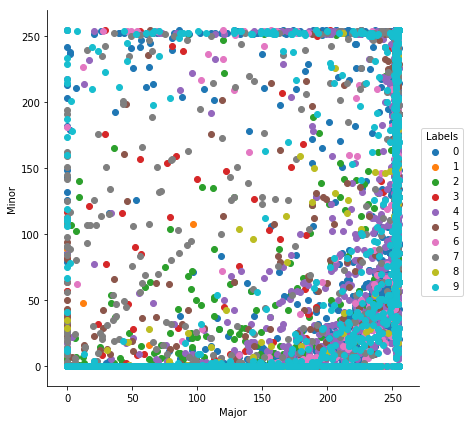

In [187]:
import seaborn as sns
sns.FacetGrid(z,hue='Labels',size=6).map(plt.scatter,'Major','Minor').add_legend()
plt.show()

<h3>Using sklearn</h3>

In [200]:
from sklearn.decomposition import PCA

In [201]:
pca = PCA(n_components=2)
images=pca.fit_transform(x2)

In [202]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [203]:
images.shape

(60000, 2)

In [204]:
d={'Major':images[:,0],'Minor':images[:,1],'Labels':a}
z=pd.DataFrame(data=d)

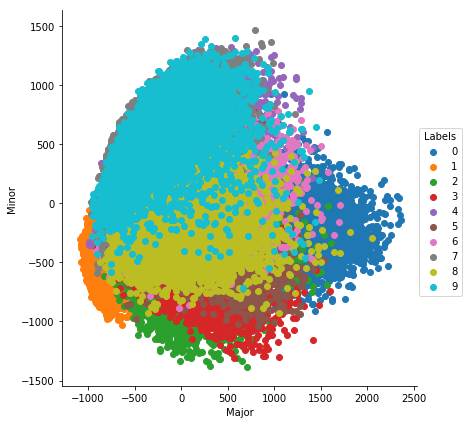

In [206]:
import seaborn as sns
sns.FacetGrid(z,hue='Labels',size=6).map(plt.scatter,'Major','Minor').add_legend()
plt.show()

<h3>PCA on standardized data</h3>

In [207]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x2)
scaled_data = scaler.transform(x2)

/home/rg/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/rg/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [208]:
pca = PCA(n_components=2)
images=pca.fit_transform(scaled_data)

In [209]:
d={'Major':images[:,0],'Minor':temp_cor[:,1],'Labels':a}
z=pd.DataFrame(data=d)

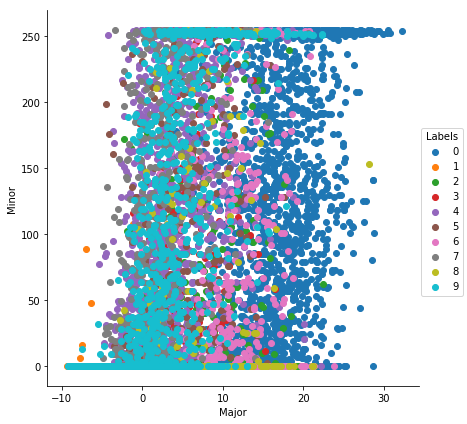

In [210]:
import seaborn as sns
sns.FacetGrid(z,hue='Labels',size=6).map(plt.scatter,'Major','Minor').add_legend()
plt.show()

Conclusion:Should not standardize data for this dataset